In [1]:
%load_ext autoreload
%autoreload 2

import h5py
import sys
from scipy import constants as sp
import os
import datetime
from dateutil import parser
from matplotlib import pyplot as plt
from numba import njit, prange

sys.path.append('..')

from solver import solver
from analyzer import analyzer
from integrators import relativistic_boris
from plot import *
from utils import field_line, Re, get_txx_params

from fields import *
from distributions import *

In [2]:
# T89 PARAMS
parmod_t89, ut, sw_v = get_txx_params('../data/qindenton_2008', '../data/omni_20080326', datetime.datetime(2008, 3, 26, 11, 19), model='t89')

In [3]:
# T96 PARAMS
parmod_t96, ut, sw_v = get_txx_params('../data/qindenton_2008', '../data/omni_20080326', datetime.datetime(2008, 3, 26, 11, 19), model='t96')

In [4]:
# T01 PARAMS
parmod_t01, ut, sw_v = get_txx_params('../data/qindenton_2008', '../data/omni_20080326', datetime.datetime(2008, 3, 26, 11, 19), model='t01')

In [5]:
# T04 PARAMS
parmod_t04, ut, sw_v = get_txx_params('../data/qindenton_2008', '../data/omni_20080326', datetime.datetime(2008, 3, 26, 11, 19), model='t04')

In [6]:
b_field_89 = t89(parmod_t89, t0=ut, sw_v=sw_v)
b_field_96 = t96(parmod_t96, t0=ut, sw_v=sw_v)
b_field_01 = t01(parmod_t01, t0=ut, sw_v=sw_v)
b_field_04 = t04(parmod_t04, t0=ut, sw_v=sw_v)

Load IGRF coefficients ...


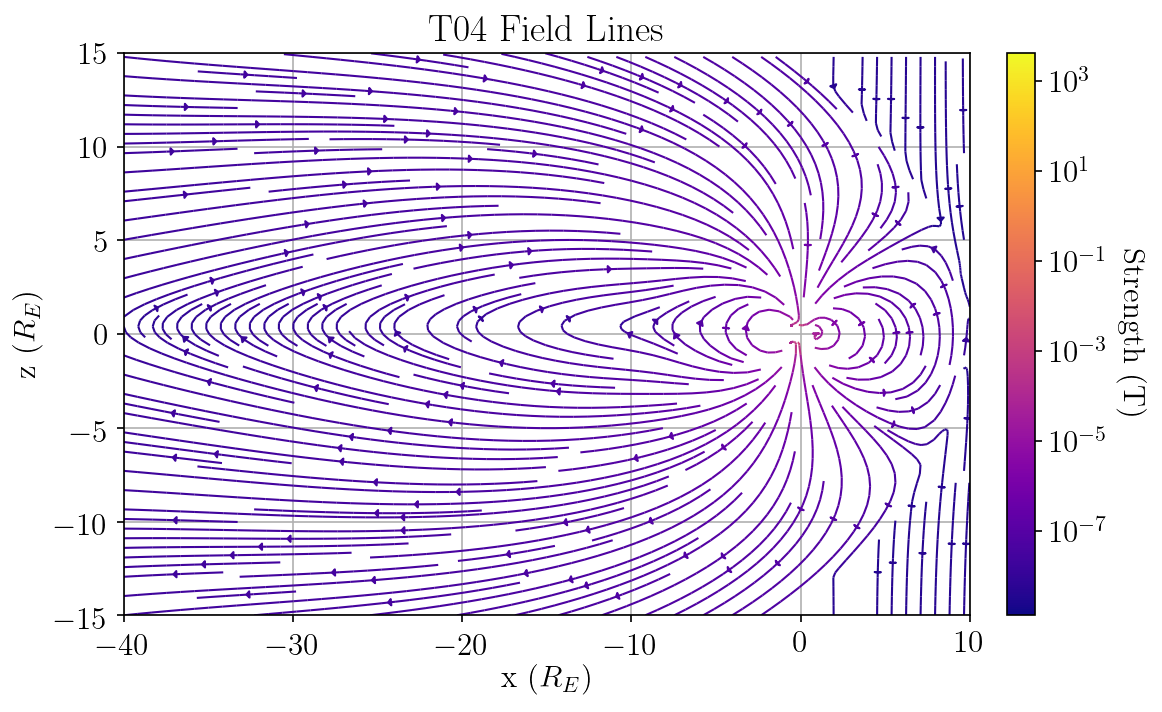

In [9]:
format_plots()
plot_field(b_field_04, np.array([1., 0., 0.]), np.array([0., 0., 1.]), [-40, 10], [-15, 15], nodes=100, title='T04 Field Lines', size=(8, 5))

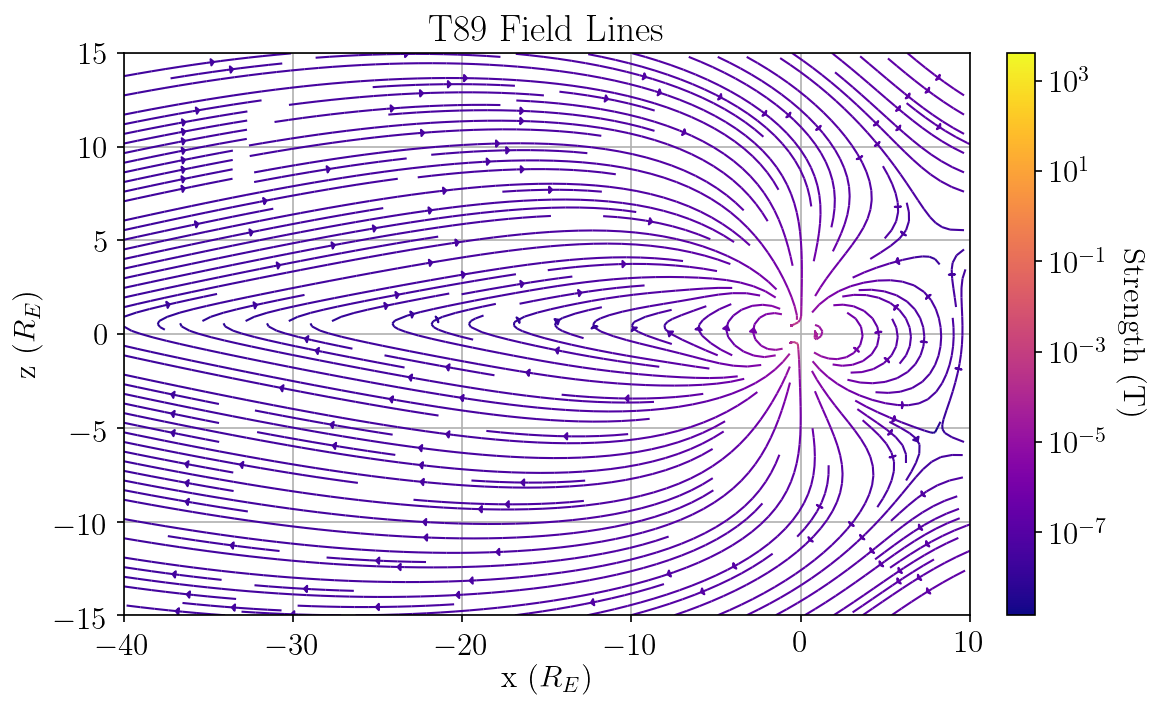

In [11]:
from plot import *

format_plots()
plot_field(b_field_89, np.array([1., 0., 0.]), np.array([0., 0., 1.]), [-40, 10], [-15, 15], nodes=100, title='T89 Field Lines', size=(8, 5))

In [7]:
a = analyzer('nithin_event')

Loaded file nithin_event.hdf5 containing 1.21 gigabytes of information.


In [120]:
e_field = zero_field()

s = solver(e_field, b_field_04, drop_lost=False)

s.populate_by_eq_pa(100,
                    9.,
                    delta(5e5),
                    uniform(np.radians(0), np.radians(90)),
                    uniform(0, 2 * np.pi)
                   )

s.solve(2, 1e-4, 1e-3)

#s.save('nithin_event')

100%|██████████| 100/100 [01:04<00:00,  1.54it/s]


'\n@njit(parallel=True)\ndef b_along_gca(b_field, gca_results, time):\n    num_particles = np.shape(gca_results)[0]\n    steps = np.shape(gca_results)[1]\n\n    b_along_gca_v = np.zeros((num_particles, steps, 3))\n    \n    for i in prange(num_particles):\n        for j in prange(steps):\n            if (gca_results[i, j] == 0).all():\n                continue\n                \n            b_along_gca_v[i, j, :] = b_field(gca_results[i, j, :], time[j])\n\n    return b_along_gca_v\n'

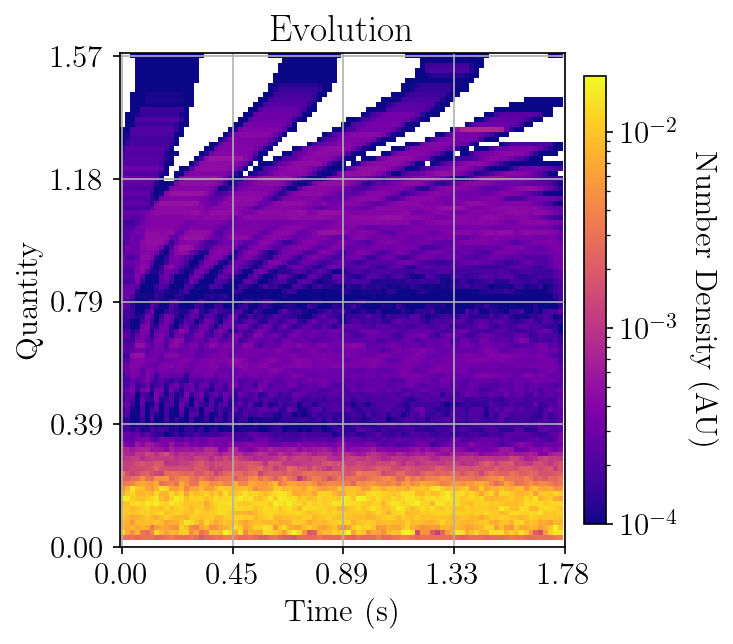

In [24]:
mus = a.eq_pitch_ang_diff()[0]
plot_evolution(a.eq_pitch_ang_diff()[1][:, :1800], a.time()[:1800], already_distribution=True, decimate=20, log=True, avg=True, y_lim=[mus[0], mus[-1]])

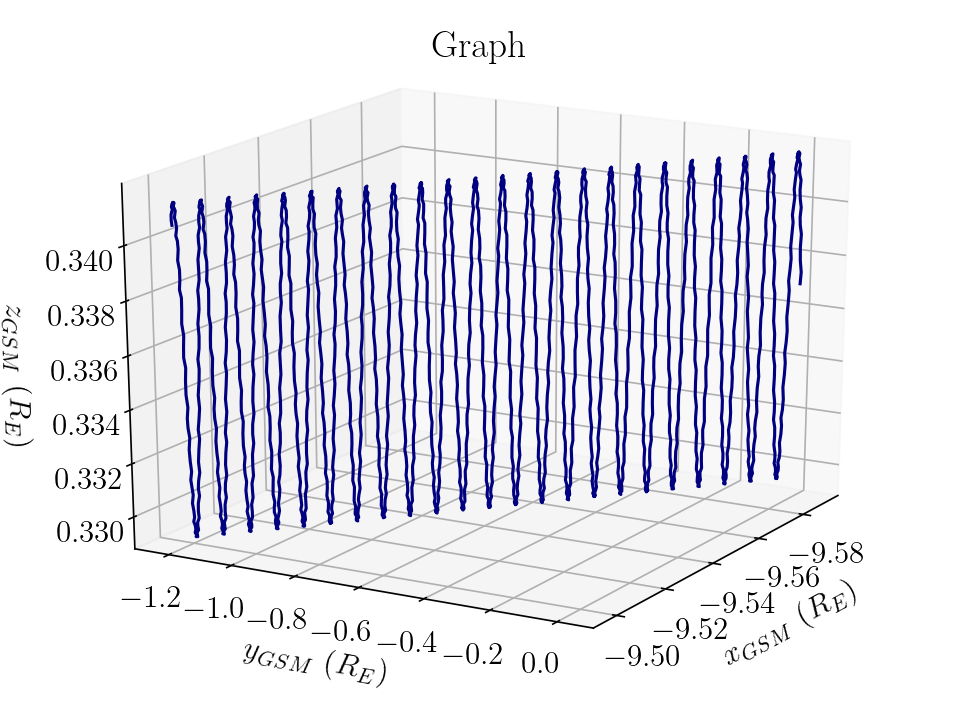

In [30]:
format_plots(colormap='jet')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

plot_3d(a.gca() / Re, 425, 20, 30, fig=fig, ax=ax)
#plot_3d(a.position() / Re, 425, 10, 50, fig=fig, ax=ax)